# Relevant imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date as dt

import folium
from folium import plugins
from folium.plugins import HeatMap
#http://geopandas.org/install.html
import geopandas as gpd

In [2]:
inspections = pd.read_pickle('./datasets/cleaned_inspections.pickle')

In [3]:
inspections.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Community Area,Violation Numbers,Violation Comments
0,2345318,SUBWAY,SUBWAY,2529116,Restaurant,1,2620 N NARRAGANSETT AVE,2019-11-08,Canvass Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.927995,-87.785752,"41.92799528871574, -87.78575236468352",Belmont Cragin,"[3, 5, 58]",[ 2-102.14(O) OBSERVED NO WRITTEN EMPLOYEE HE...
1,2321166,SUBWAY,SUBWAY,2529116,Restaurant,1,2620 N NARRAGANSETT AVE,2019-11-06,Canvass,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.927995,-87.785752,"41.92799528871574, -87.78575236468352",Belmont Cragin,"[3, 5, 10, 22, 33, 57, 58]",[ OBSERVED NO WRITTEN EMPLOYEE HEALTH POLICY O...


# Exploratory data analysis

In [ ]:
#TODO: Plot piecharts, barplots, histograms for our different features to see if there are any emerging patterns

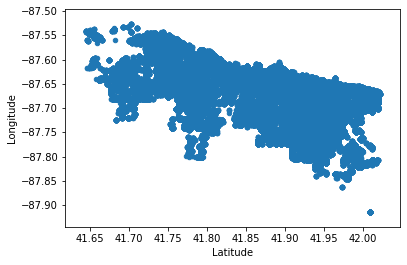

In [5]:
# Let's look at the locations of each facility type in the CFI data by ploting the latitude and longitude 
inspections.plot.scatter(x = 'Latitude', y ='Longitude')
plt.show()

It seems like we have an unconnected location in the bottom right. It is also remarkable that the plot looks like the Chicago map that we came across on the internet.

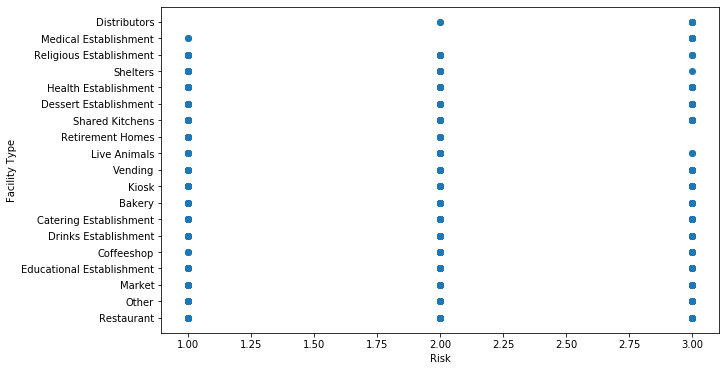

In [25]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inspections['Risk'], inspections['Facility Type'])
ax.set_xlabel('Risk')
ax.set_ylabel('Facility Type')
plt.show()

In [49]:
counts = pd.DataFrame(inspections.groupby(by=['Facility Type'])['Results'].value_counts()) 
counts

Results
Facility Type Results                    
Bakery        Pass                   1497
              Fail                    604
              Pass w/ Conditions      315
              Out of Business         225
              No Entry                 76
...                                   ...
Vending       Not Ready                13
              Fail                     11
              Pass w/ Conditions        5
              Out of Business           4
              No Entry                  1

[109 rows x 1 columns]

In [60]:
group_by_modelLine = inspections.groupby(by=['Facility Type', 'Results'])['Results']
car_data_count = group_by_modelLine.count()

In [61]:
car_data_count

Facility Type  Results           
Bakery         Fail                   604
               No Entry                76
               Not Ready               34
               Out of Business        225
               Pass                  1497
                                     ... 
Vending        No Entry                 1
               Not Ready               13
               Out of Business          4
               Pass                    14
               Pass w/ Conditions       5
Name: Results, Length: 109, dtype: int64

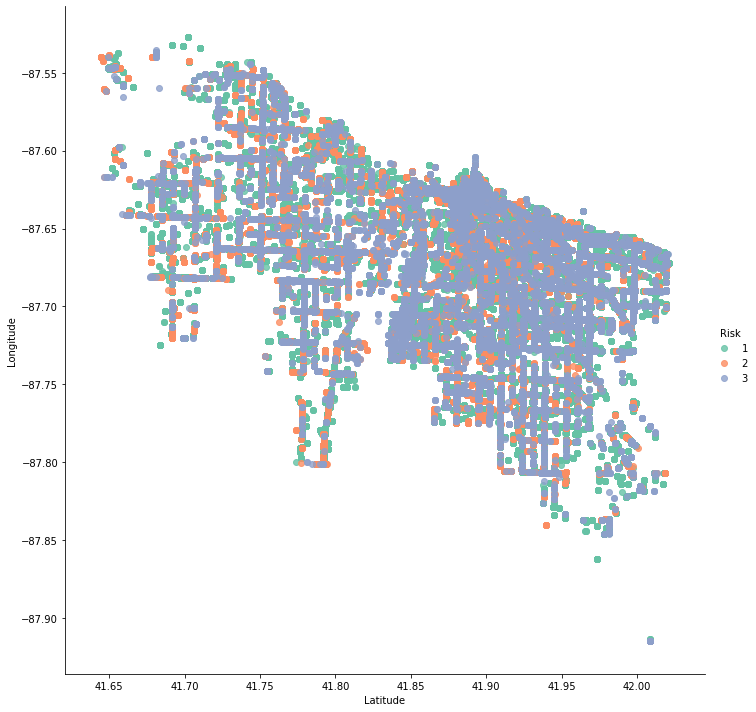

In [31]:
sns.lmplot(x = 'Latitude', y ='Longitude', 
           data = inspections, 
           hue = "Risk", 
           height = 10,
           palette="Set2", fit_reg = False)

# Data Visualization using folium

## 1. Restaurants on a map

Let's display on a map the different restaurants in our dataset

In [ ]:
#We only display restaurant in our map
restaurant_locations = inspections[inspections['Facility Type']=='restaurant']
#We reduce the data size & display only restaurants that still exist in year 2018
restaurant_locations = restaurant_locations[restaurant_locations['Inspection Date'].dt.year==2018]
restaurant_locations = restaurant_locations[['DBA Name', 'Latitude','Longitude']].drop_duplicates()
restaurant_locations_array = np.array(restaurant_locations)

In [ ]:
locations_map = folium.Map(location=[41.86087, -87.608945], zoom_start=10)
for i, info in enumerate(restaurant_locations_array):
    folium.Marker(
        location=[info[1], info[2]],
        popup=info[0],
        icon=folium.Icon(color='red', icon='info-sign')).add_to(locations_map)
#locations_map.save('restaurants_map.html')
locations_map

In [ ]:
len(inspections['Location'].unique())

In [ ]:
len(inspections['DBA Name'].unique())

In [ ]:
len(inspections['Community Area'].unique())

* From the map displayed we see that the icons are stacked and condensed into the same regions, hence this time of displaying does not meet our needs.
* We also see above that apparently the locations of the restaurants we have are not very precise because we have less locations that establishments.Maybe this is also due to the fact that some restaurants which get closed are replaced by others at the same location.

We decide to show a heatmap of the restaurants which will display the restaurants "concentration" (areas with high concentration of restaurants)

## 2. Heatmap showing restaurants locations concentration

In [ ]:
locations_heatmap = folium.Map([41.86087, -87.608945], zoom_start=11)

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in restaurant_locations.iterrows()]

# Plot it on the map
HeatMap(heat_data, radius=14).add_to(locations_heatmap)

# Display the map
#locations_heatmap.save('restaurants_heatmap.html')
locations_heatmap

As expected, there are a lot more restaurants in the city center of chicago.

## 3. Number of restaurants by community area

Now we want to display the community areas as a heatmap of the number of restaurants they have.

Get community areas boundaries from:
https://www.chicago.gov/city/en/depts/doit/dataset/boundaries_-_communityareas.html

In [ ]:
# set the filepath and load in a shapefile
#fp = "./datasets/boundaries.geojson"
#boundaries_community_areas = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#boundaries_community_areas.head()

In [ ]:
#We process the GEOdataframe in a way that is useful to our analysis and then export it as a new .geojson
#boundaries_community_areas=boundaries_community_areas[['community','geometry']]
#boundaries_community_areas.loc[74,'community']='O\'HARE'
#boundaries_community_areas.sort_values(by=['community'], inplace=True)
#boundaries_community_areas.reset_index(inplace=True,drop=True)
#boundaries_community_areas.reset_index(inplace=True,drop=False)
#boundaries_community_areas.rename(columns={"index": "area_number"},inplace=True)
#boundaries_community_areas['community'] = boundaries_community_areas['community'].astype('str')
#boundaries_community_areas.to_file("boundaries_processed.geojson", driver="GeoJSON")

In [ ]:
fp = "./boundaries_processed.geojson"
boundaries_community_areas = gpd.read_file(fp)
boundaries_community_areas.head()

We do a sanity check to see if the community areas in the inspection data we got from geopy correspond to the community areas we get from Chicago Government portal.

In [ ]:
#We care about restaurants only
restaurants_intensity = inspections[inspections['Facility Type']=='restaurant']
#We focus on year 2018
restaurants_intensity = restaurants_intensity[restaurants_intensity['Inspection Date'].dt.year==2018]
restaurants_intensity = restaurants_intensity[['Community Area','DBA Name']].drop_duplicates().groupby('Community Area')['DBA Name'].agg({'nbr_restaurants' : len})
restaurants_intensity.reset_index(inplace=True)
restaurants_intensity['Community Area'] = restaurants_intensity['Community Area'].str.upper().str.strip()
restaurants_intensity

There are 4 community areas that we don't have any restaurants in our dataset, let's add them to our data with nbr_restaurants = 0

In [ ]:
missing_1 = set(boundaries_community_areas['community'])-set(restaurants_intensity['Community Area'])
missing_1 = pd.DataFrame(missing_1, columns=['Community Area'])
missing_1['nbr_restaurants'] = 0
print("Community areas missing in the inspection dataset: ")
missing_1

In [ ]:
missing_2 = set(restaurants_intensity['Community Area'])-set(boundaries_community_areas['community'])
missing_2 = pd.DataFrame(missing_2, columns=['Community Area'])
print("Community areas missing in the government dataset: ")
missing_2

Also CHINATOWN is mentioned in our dataset but not on the gov data.

After an easy Google search [source](https://www.google.com/search?client=safari&rls=en&q=chinatown+chicago&ie=UTF-8&oe=UTF-8), we see that CHINATOWN is in reality ARMOUR SQUARE

In [ ]:
restaurants_intensity.loc[14,'Community Area']='ARMOUR SQUARE'
restaurants_intensity = restaurants_intensity.groupby('Community Area')['nbr_restaurants'].agg({'nbr_restaurants' : sum})
restaurants_intensity.reset_index(inplace=True)
restaurants_intensity

We can now merge the community areas and display the resulting nbr_restaurants

In [ ]:
#restaurants_intensity = restaurants_intensity.append(missing_1)
restaurants_intensity.sort_values(by=['Community Area'], inplace=True)
restaurants_intensity.reset_index(inplace=True,drop=True)
restaurants_intensity['Community Area'] = restaurants_intensity['Community Area'].astype('str')
restaurants_intensity

In [ ]:
# Initialize the map:
restaurants_by_community = folium.Map([41.86087, -87.608945], zoom_start=11, tiles = "cartodbpositron")
 
# Add the color for the chloropleth:
restaurants_by_community.choropleth(
 geo_data=fp,
 data=restaurants_intensity,
 columns=['Community Area', 'nbr_restaurants'],
 key_on='feature.properties.community',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of restaurants by community'
)
folium.LayerControl().add_to(restaurants_by_community)
 
# Save to html
#restaurants_by_community.save('restaurants_by_community.html')
restaurants_by_community

## 4. Number of grocery stores by community area

After a small research, we found out about a problem affecting public health in Chicago at a large scale called **Food deserts**. In a report by the Illinois Advisory Committee to the United States Commission on Civil Rights, it is reported that some of the community areas in Chicago are lacking supermarkets, grocery stores and healthy food in general. Restricted access to healthy foods lead to higher rates of chronic illness like diabetes, hypertension, or cardiovascular disease.

Furthermore, it is stated in the report that these food desert neighborhoods are almost exclusively in African American neighborhoods making the issue a civil rights one beyond its public health dimension.

**In the next part we will try to see if we can visualize the food deserts using the food inspection dataset**


[source](https://www.usccr.gov/pubs/docs/IL-FoodDeserts-2011.pdf)

In [ ]:
fp = "./boundaries_processed.geojson"
boundaries_community_areas = gpd.read_file(fp)
boundaries_community_areas.head()

In [ ]:
#We care about grocery stores only
groceries_intensity = inspections[inspections['Facility Type']=='grocery store']
#We focus on year 2018
groceries_intensity = groceries_intensity[groceries_intensity['Inspection Date'].dt.year==2018]
groceries_intensity = groceries_intensity[['Community Area','DBA Name']].drop_duplicates().groupby('Community Area')['DBA Name'].agg({'nbr_grocery' : len})
groceries_intensity.reset_index(inplace=True)
groceries_intensity['Community Area'] = groceries_intensity['Community Area'].str.upper().str.strip()
groceries_intensity

In [ ]:
missing_1 = set(boundaries_community_areas['community'])-set(groceries_intensity['Community Area'])
missing_1 = pd.DataFrame(missing_1, columns=['Community Area'])
missing_1['nbr_restaurants'] = 0
print("Community areas missing in the inspection dataset: ")
missing_1

In [ ]:
groceries_intensity.loc[13,'Community Area']='ARMOUR SQUARE'
groceries_intensity = groceries_intensity.groupby('Community Area')['nbr_grocery'].agg({'nbr_grocery' : sum})
groceries_intensity.reset_index(inplace=True)
groceries_intensity

In [ ]:
restaurants_intensity.sort_values(by=['Community Area'], inplace=True)
restaurants_intensity.reset_index(inplace=True,drop=True)
restaurants_intensity['Community Area'] = restaurants_intensity['Community Area'].astype('str')
restaurants_intensity

In [ ]:
# Initialize the map:
groceries_by_community = folium.Map([41.86087, -87.608945], zoom_start=11, tiles = "cartodbpositron")
 
# Add the color for the chloropleth:
groceries_by_community.choropleth(
 geo_data=fp,
 data=groceries_intensity,
 columns=['Community Area', 'nbr_grocery'],
 key_on='feature.properties.community',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of grocery stores by community'
)
folium.LayerControl().add_to(groceries_by_community)
 
# Save to html
groceries_by_community.save('groceries_by_community.html')
groceries_by_community

We certainly see a difference in the concentration of grocery stores between the North and the South, the south being quite sparse.
**idee: ajouter timestamp par année pour voir si des mesures on ete prises**

"Chicago’s segregation is certainly legendary, with the North and South sides divided by class and race. To keep it stereotypically simple: The North Side is white, the South Side is black." [source](https://chicago.eater.com/2018/12/13/18138387/chicago-magazine-john-kessler-food-scene-racism-immigration-food)